<a href="https://colab.research.google.com/github/pradeepasen/RagaAI-Catalyst/blob/main/Python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("weather.csv")
print(df.head())


   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

In [6]:
cols_to_fill = ['MinTemp','MaxTemp','Rainfall','Humidity3pm','Temp9am','Temp3pm']
df[cols_to_fill] = df[cols_to_fill].fillna(method='ffill')

/tmp/ipython-input-3642128692.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[cols_to_fill] = df[cols_to_fill].fillna(method='ffill')


In [9]:
df['MinTemp'].fillna(method='ffill', inplace=True)
df['MaxTemp'].fillna(method='ffill', inplace=True)
df['Rainfall'].fillna(0, inplace=True)  # Missing rainfall = 0

/tmp/ipython-input-1580669705.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MinTemp'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-1580669705.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MinTemp'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-1580669705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavio

In [10]:
top_hottest = df[['MaxTemp']].sort_values(by='MaxTemp', ascending=False).head(10)
print("Top 10 Hottest Days:")
print(top_hottest)
print("\n")

Top 10 Hottest Days:
     MaxTemp
71      35.8
72      35.7
135     35.2
62      35.0
59      35.0
90      34.9
131     34.7
70      34.2
61      34.2
66      34.1




In [11]:
top_coldest = df[['MinTemp']].sort_values(by='MinTemp', ascending=True).head(10)
print("Top 10 Coldest Days:")
print(top_coldest)
print("\n")

Top 10 Coldest Days:
     MinTemp
292     -5.3
313     -3.7
297     -3.7
283     -3.5
265     -3.5
291     -3.4
300     -3.3
246     -3.1
282     -2.9
273     -2.8




In [12]:
top_wettest = df[['Rainfall']].sort_values(by='Rainfall', ascending=False).head(10)
print("Top 10 Wettest Days:")
print(top_wettest)
print("\n")

Top 10 Wettest Days:
     Rainfall
3        39.8
22       25.8
30       22.6
146      19.8
263      19.2
79       18.8
52       17.4
327      17.4
250      16.8
9        16.2




In [14]:
top_hottest = df[['MaxTemp']].sort_values(by='MaxTemp', ascending=False).head(10)
top_coldest = df[['MinTemp']].sort_values(by='MinTemp', ascending=True).head(10)
print("Top 10 Hottest Observations:")
print(top_hottest)
print("\nTop 10 Coldest Observations:")
print(top_coldest)

Top 10 Hottest Observations:
     MaxTemp
71      35.8
72      35.7
135     35.2
62      35.0
59      35.0
90      34.9
131     34.7
70      34.2
61      34.2
66      34.1

Top 10 Coldest Observations:
     MinTemp
292     -5.3
313     -3.7
297     -3.7
283     -3.5
265     -3.5
291     -3.4
300     -3.3
246     -3.1
282     -2.9
273     -2.8


In [15]:
Q1 = df['MaxTemp'].quantile(0.25)
Q3 = df['MaxTemp'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['MaxTemp'] < Q1 - 1.5*IQR) | (df['MaxTemp'] > Q3 + 1.5*IQR)]
print(f"Number of MaxTemp Outliers: {len(outliers)}")

Number of MaxTemp Outliers: 0


In [16]:
df['Rolling_MaxTemp'] = df['MaxTemp'].rolling(7).mean()
df['Rolling_MinTemp'] = df['MinTemp'].rolling(7).mean()

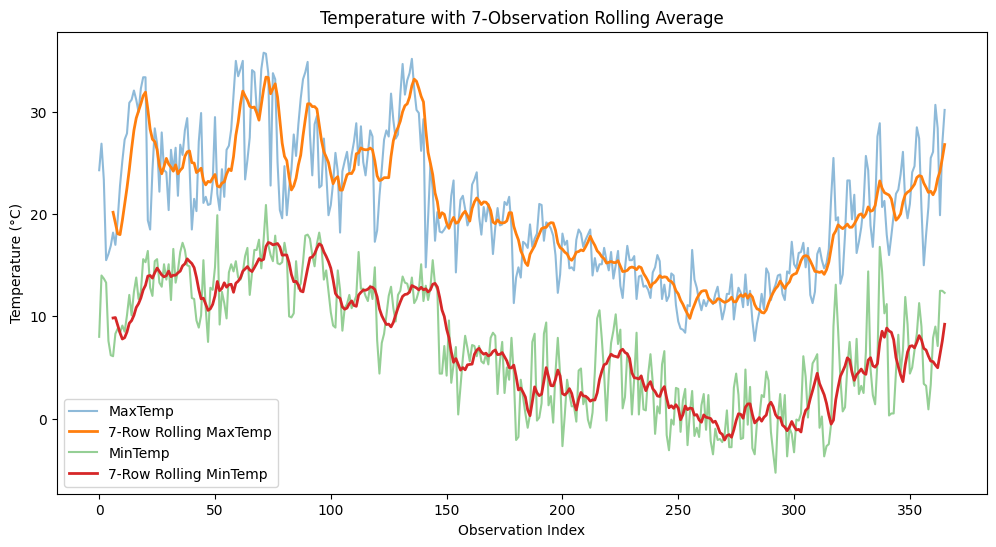

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df['MaxTemp'], alpha=0.5, label='MaxTemp')
plt.plot(df['Rolling_MaxTemp'], label='7-Row Rolling MaxTemp', linewidth=2)
plt.plot(df['MinTemp'], alpha=0.5, label='MinTemp')
plt.plot(df['Rolling_MinTemp'], label='7-Row Rolling MinTemp', linewidth=2)
plt.title("Temperature with 7-Observation Rolling Average")
plt.xlabel("Observation Index")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

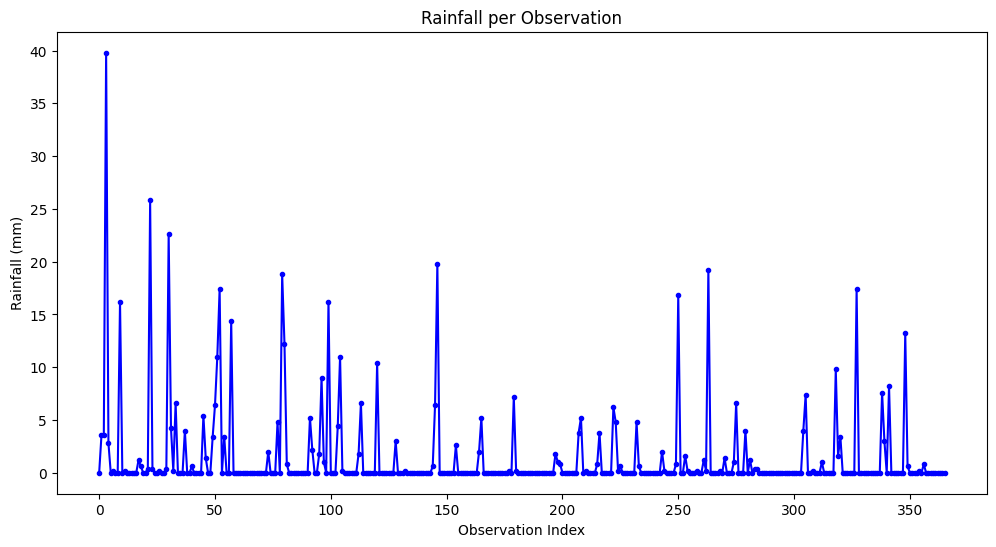

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df['Rainfall'], color='b', marker='o', markersize=3)
plt.title("Rainfall per Observation")
plt.xlabel("Observation Index")
plt.ylabel("Rainfall (mm)")
plt.show()

In [19]:
heavy_rain = df[df['Rainfall'] > 50]
print(f"Number of Heavy Rain Observations (>50mm): {len(heavy_rain)}")
print(heavy_rain[['Rainfall']])

Number of Heavy Rain Observations (>50mm): 0
Empty DataFrame
Columns: [Rainfall]
Index: []


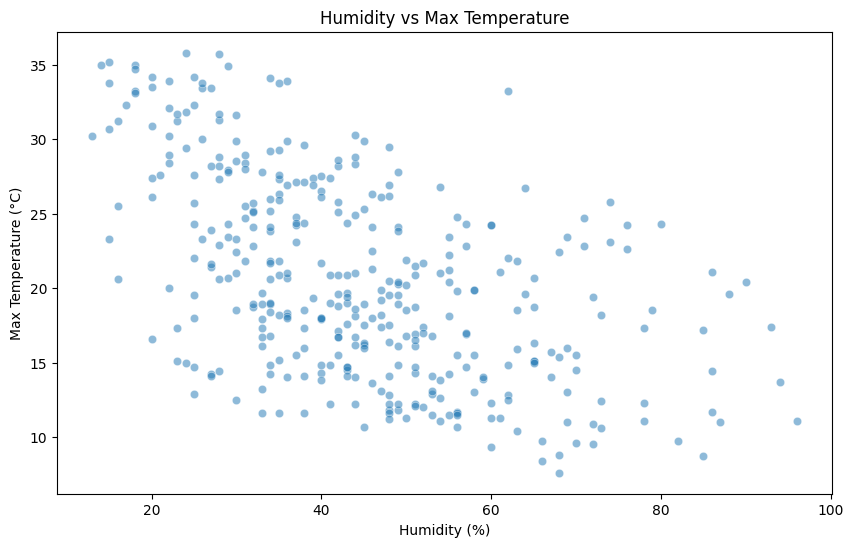

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Humidity3pm', y='MaxTemp', data=df, alpha=0.5)
plt.title("Humidity vs Max Temperature")
plt.xlabel("Humidity (%)")
plt.ylabel("Max Temperature (°C)")
plt.show()

In [23]:
corr_matrix = df[['MinTemp','MaxTemp','Temp9am','Temp3pm','Rainfall','Humidity3pm']].corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
              MinTemp   MaxTemp   Temp9am   Temp3pm  Rainfall  Humidity3pm
MinTemp      1.000000  0.752471  0.916745  0.722730  0.201939    -0.040709
MaxTemp      0.752471  1.000000  0.870604  0.989261 -0.073560    -0.533327
Temp9am      0.916745  0.870604  1.000000  0.844406  0.077299    -0.255681
Temp3pm      0.722730  0.989261  0.844406  1.000000 -0.087493    -0.581676
Rainfall     0.201939 -0.073560  0.077299 -0.087493  1.000000     0.289013
Humidity3pm -0.040709 -0.533327 -0.255681 -0.581676  0.289013     1.000000


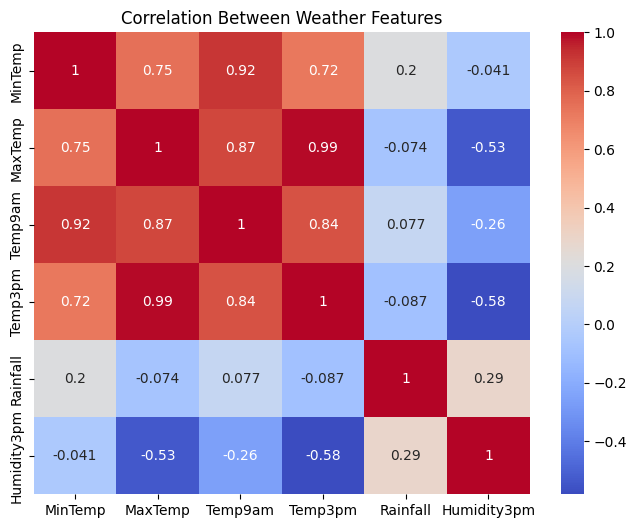

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Weather Features")
plt.show()

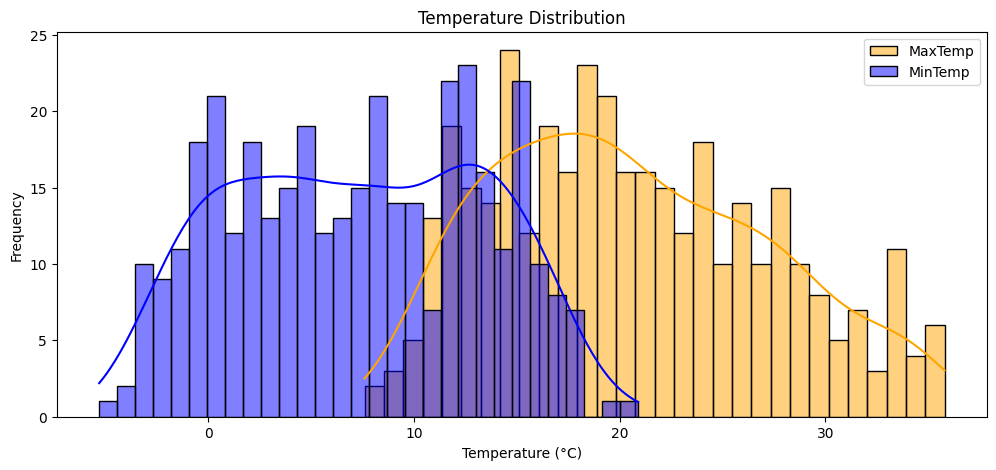

In [25]:
plt.figure(figsize=(12,5))
sns.histplot(df['MaxTemp'], kde=True, color='orange', label='MaxTemp', bins=30)
sns.histplot(df['MinTemp'], kde=True, color='blue', label='MinTemp', bins=30)
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [26]:
extreme_temp = df[(df['MaxTemp'] > 40) | (df['MinTemp'] < 0)]
extreme_rain = df[df['Rainfall'] > 50]

print(f"Number of extreme temperature events: {len(extreme_temp)}")
print(f"Number of heavy rain events: {len(extreme_rain)}")

Number of extreme temperature events: 51
Number of heavy rain events: 0


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv("weather.csv")
cols_to_fill = ['MinTemp','MaxTemp','Rainfall','Humidity3pm','Temp9am','Temp3pm']
for col in cols_to_fill:
    df[col] = df[col].ffill()
    df[col] = df[col].bfill()
df['Rainfall'] = df['Rainfall'].fillna(0)
df['Rolling_MaxTemp'] = df['MaxTemp'].rolling(7).mean()
df['Rolling_MinTemp'] = df['MinTemp'].rolling(7).mean()
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].ffill()
    df[col] = df[col].bfill()
    df[col] = df[col].fillna(0)
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes':1, 'No':0})
df['RainTomorrow'] = df['RainTomorrow'].fillna(0)

features = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine',
            'WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity3pm','Temp9am','Temp3pm']
X = df[features]
y = df['RainTomorrow']

X = X.ffill().bfill().fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        58
           1       0.62      0.31      0.42        16

    accuracy                           0.81        74
   macro avg       0.73      0.63      0.65        74
weighted avg       0.79      0.81      0.79        74



In [2]:
!git config --global user.email "pradeepasenthil1978@gmail.com"
!git config --global user.name "pradeepasen"

!git clone https://github.com/pradeepasen/weather_prediction.git
%cd weather_prediction

!git checkout -b my_new_branch
!cp /mydrive/Python_project.ipynb ./
!git add Python_project.ipynb
!git commit -m "Added notebook"
!git push origin my_new_branch


Cloning into 'weather_prediction'...
/content/weather_prediction/weather_prediction
Switched to a new branch 'my_new_branch'
cp: cannot stat '/mydrive/Python_project.ipynb': No such file or directory
fatal: pathspec 'Python_project.ipynb' did not match any files
On branch my_new_branch

Initial commit

nothing to commit (create/copy files and use "git add" to track)
error: src refspec my_new_branch does not match any
error: failed to push some refs to 'https://github.com/pradeepasen/weather_prediction.git'
